# ML-Fundamentals - Neural Networks - Exercise: Minimal Fully Connected Network for MNIST

## Table of Contents
* [Requirements](#Requirements) 
  * [Modules](#Python-Modules) 
  * [Data](#Data)
* [Simple MNIST Network](#Simple-MNIST-Network)
  * [Todo: Transparency](#Todo:-Transparency)
  * [Todo: Comprehension](#Todo:-Comprehension)
  * [Todo: Step towards a NN-Framework](#Todo:-Step-towards-a-NN-Framework)

# Requirements


## Python-Modules

In [2]:
# third party
import numpy as np
import matplotlib.pyplot as plt

# internal
from deep_teaching_commons.data.fundamentals.mnist import Mnist

## Data

In [3]:
# create mnist loader from deep_teaching_commons
mnist_loader = Mnist(data_dir='data')

# load all data, labels are one-hot-encoded, images are flatten and pixel squashed between [0,1]
train_images, train_labels, test_images, test_labels = mnist_loader.get_all_data(one_hot_enc=True, normalized=True)

# shuffle training data
shuffle_index = np.random.permutation(60000)
train_images, train_labels = train_images[shuffle_index], train_labels[shuffle_index]

auto download is active, attempting download
data directory does not exist, starting download...
train-images-idx3-ubyte.gz successfully downloaded
train-labels-idx1-ubyte.gz successfully downloaded
t10k-images-idx3-ubyte.gz successfully downloaded
t10k-labels-idx1-ubyte.gz successfully downloaded
... mnist data completely downloaded, enjoy.


# Simple MNIST Network
The presented network is an adaptation of Michael Nielson's introductory example to neural networks. It is recommended, though not necessary, to read the first two chapters of his great online book ['Neural Networks and Deep Learning'](http://neuralnetworksanddeeplearning.com/) for a better understanding of the given example. Compared to the [original](https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/src/network.py) by Nielsen, the present variant was vectorized and the sigmoid activation function replaced by a rectified linear unit function (ReLU). As a result, the code is written much more compact, and the optimization of the model is much more efficient. 

## Todo: Transparency
Your goal is to understand how the implementation works. Therefore you can do the following:
  - Add comments to functions and lines of code. Follow the [Google-Pyhton](https://google.github.io/styleguide/pyguide.html) guidelines for comments.
  - Add a verbose argument (`boolean`) to the functions that adds meaningful `print` lines to the network, if it is `true`.
  - Add a variable `delta_hist` which store the delta value calculated on the output layer during each iteration of the function `grads(X,Y,weights)`. After the optimization process plot `delta_hist`.
  
Hopefully, this implementation of a neural network is clear after your investigation. You should be able to answer following questions:
  - Which cost function is used, what is its derivation and how is it implemented?
  - Why are the boundaries of your plot between [-1,0], why it is so noisy, how do you can reduce the noice and what is the difference to a usual plot of a loss function?
  - How does the network implement the backpropagation algorithm?

In [6]:
delta_hist =[] #history of the middled deltas

def feed_forward(X, weights):
    """Calculates the prediction for X with the given weights using ReLu
    
    """
    a = [X]
    for w in weights:
        a.append(np.maximum(a[-1].dot(w),0))
    return a

def grads(X, Y, weights):
    """Calculates the gradients for the given weights
    """
    grads = np.empty_like(weights) # initialize with the size of weights since we're gonna have one grad per weight
    a = feed_forward(X, weights)
    # https://brilliant.org/wiki/backpropagation/ or https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications
    delta = a[-1] - Y
    delta_hist.append(np.sum(delta*Y)/len(X)) #mean squared error loss
    grads[-1] = a[-2].T.dot(delta) #Warum??
    for i in range(len(a)-2, 0, -1):
        delta = (a[i] > 0) * delta.dot(weights[i].T) #go backwards and pass through delta
        grads[i-1] = a[i-1].T.dot(delta)
    return grads / len(X)

trX, trY, teX, teY = train_images, train_labels, test_images, test_labels
weights = [np.random.randn(*w) * 0.1 for w in [(784, 200), (200,100), (100, 10)]] #init with random weights
num_epochs, batch_size, learn_rate = 20, 50, 0.1 #batch size: Number of training examples used in one go
for i in range(num_epochs):
    for j in range(0, len(trX), batch_size):
        X, Y = trX[j:j+batch_size], trY[j:j+batch_size] #take values of batch
        weights -= learn_rate * grads(X, Y, weights) #apply gradient to the weights
        once = False
    prediction_test = np.argmax(feed_forward(teX, weights)[-1], axis=1) #test the function 
    print (i + 1, np.mean(prediction_test == np.argmax(teY, axis=1))) #keine Ahnung welche Aussage dieser Mittelwert haben soll

1 0.9443
2 0.9561
3 0.9617
4 0.9639
5 0.9662
6 0.9682
7 0.9697
8 0.971
9 0.972
10 0.9727
11 0.9732
12 0.9731
13 0.9745
14 0.9753
15 0.9762
16 0.9766
17 0.9771
18 0.9772
19 0.9774
20 0.9777


## Todo: Step towards a NN-Framework
The presented implementation is compact and efficient, but hard to modify or extend. However, a modular design is crucial if you want to experiment with a neural network to understand the influence of its components. Now you make the first changes towards your own 'toy-neural-network-framework', which you should expand in the progress of the course. 

Rework the implementation from above given the classes and methods below. Again, you _do not_ have to re-engineer the whole neural network at this step. Rework the code to match the given specification and do necessary modifications only. For your understanding, you can change the names of the variables to more fitting ones.

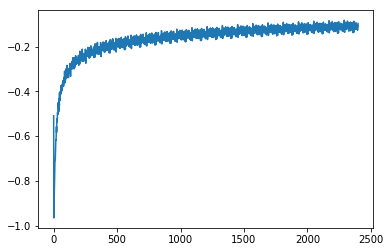

In [15]:
class FullyConnectedNetwork:
    def __init__(self, layers):
        self.delta_hist = []
        self.weights = [np.random.randn(*w) * 0.1 for w in layers]
        
    def forward(self, data):
        a = [data]
        for w in self.weights:
            a.append(np.maximum(a[-1].dot(w),0))
        return a

    def backward(self, X, Y):
        grads = np.empty_like(self.weights)
        a = self.forward(X)
        
        delta = a[-1] - Y
        self.delta_hist.append(np.sum(delta*Y)/len(X))
        grads[-1] = a[-2].T.dot(delta)
        for i in range(len(a)-2, 0, -1):
            delta = (a[i] > 0) * delta.dot(self.weights[i].T)
            grads[i-1] = a[i-1].T.dot(delta)
        return grads / len(X)

    def predict(self, data):
        return np.argmax(forward(data)[-1], axis=1)
            
class Optimizer:
    def __init__(self, network, train_data, train_labels, test_data=None, test_labels=None, epochs=100, batch_size=20, learning_rate=0.01):
        for i in range(num_epochs):
            for j in range(0, len(train_data), batch_size):
                X, Y = train_data[j:j+batch_size], train_labels[j:j+batch_size] #take values of batch
                network.weights -= learn_rate * network.backward(X, Y) #apply gradient to the weights
                once = False
        #sgd()
        
    def sgd(self):
        for i in range(num_epochs):
            for j in range(0, len(train_data), batch_size):
                X, Y = train_data[j:j+batch_size], train_labels[j:j+batch_size] #take values of batch
                network.weights -= learn_rate * network.backward(X, Y) #apply gradient to the weights
                once = False
        return None

    
# Following code should run:    
mnist_NN = FullyConnectedNetwork([(784, 200),(200,100),(100, 10)]) 
epochs, batch_size, learning_rate = 20, 500, 0.1
Optimizer(mnist_NN, train_images, train_labels, test_images, test_labels, epochs, batch_size, learning_rate)
plt.plot(mnist_NN.delta_hist)